# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [2]:
#read the data

data_path = 'countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  the Data have many features as strings and need to be converted to numerical values         <br>
2-  the data has null values         <br>
3-  some features need to be standarized         <br>

In [77]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

### **First issue** : **NAN Values**

In [78]:
#solution 
df_copy. fillna(0 , inplace=True)

In [79]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       227 non-null    object 
 7   Infant mortality (per 1000 births)  227 non-null    object 
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    object 
 10  Phones (per 1000)                   227 non-null    object 
 11  Arable (%)                          227 non-n

### **Second issue** : **Data types**

In [80]:
#solution 
for col in df_copy.columns:
    if df_copy[col].dtype == "object": 
        try:
            df_copy[col].replace({",":"."},regex = True , inplace = True)
            df_copy[col] = pd.to_numeric(df_copy[col])
            print(f"{col}: Done")

        except:
            print(f"{col}: Failed")

            pass

Country: Failed
Region: Failed
Pop. Density (per sq. mi.): Done
Coastline (coast/area ratio): Done
Net migration: Done
Infant mortality (per 1000 births): Done
Literacy (%): Done
Phones (per 1000): Done
Arable (%): Done
Crops (%): Done
Other (%): Done
Climate: Done
Birthrate: Done
Deathrate: Done
Agriculture: Done
Industry: Done
Service: Done


In [81]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

### **Third issue** : **Removing Duplicates**

In [82]:
df_copy[df_copy.duplicated() == True]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


No Duplicates found

In [83]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,227.0,2.874028e+07,1.178913e+08,7026.00,437624.0000,4786994.000,1.749777e+07,1.313974e+09
Area (sq. mi.),227.0,5.982270e+05,1.790282e+06,2.00,4647.5000,86600.000,4.418110e+05,1.707520e+07
Pop. Density (per sq. mi.),227.0,3.790471e+02,1.660186e+03,0.00,29.1500,78.800,1.901500e+02,1.627150e+04
Coastline (coast/area ratio),227.0,2.116533e+01,7.228686e+01,0.00,0.1000,0.730,1.034500e+01,8.706600e+02
Net migration,227.0,3.762115e-02,4.856712e+00,-20.99,-0.9050,0.000,9.800000e-01,2.306000e+01
Infant mortality (per 1000 births),227.0,3.503771e+01,3.538833e+01,0.00,7.8250,20.910,5.533500e+01,1.911900e+02
GDP ($ per capita),227.0,9.647137e+03,1.004749e+04,0.00,1900.0000,5500.000,1.570000e+04,5.510000e+04
Literacy (%),227.0,7.626960e+01,2.934607e+01,0.00,62.9500,90.300,9.780000e+01,1.000000e+02
Phones (per 1000),227.0,2.319018e+02,2.280990e+02,0.00,33.0500,164.100,3.829000e+02,1.035600e+03
Arable (%),227.0,1.367555e+01,1.304672e+01,0.00,3.0950,10.380,2.000000e+01,6.211000e+01


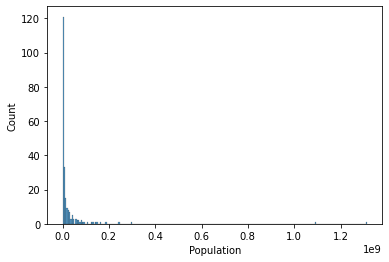

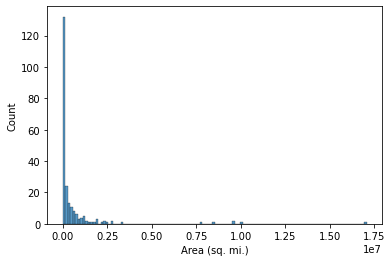

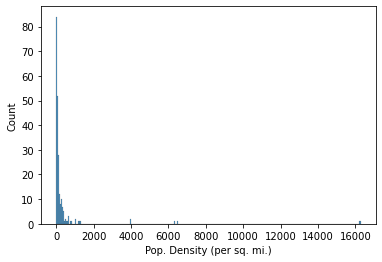

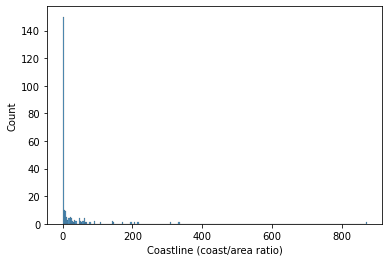

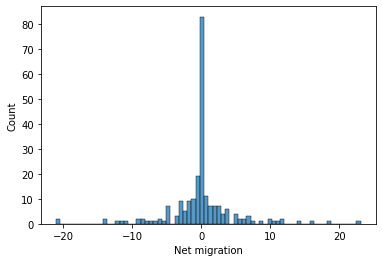

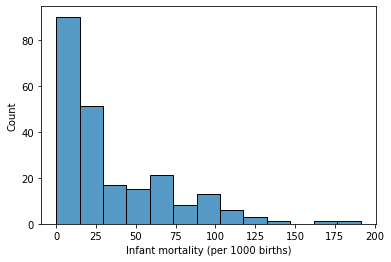

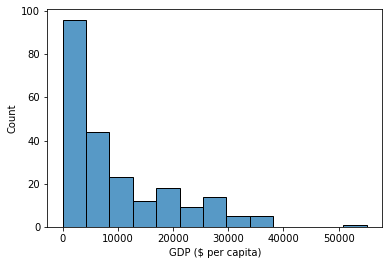

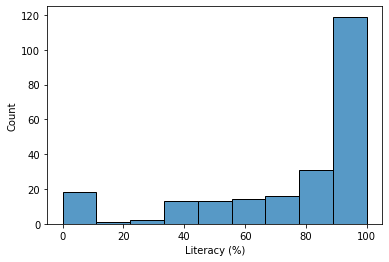

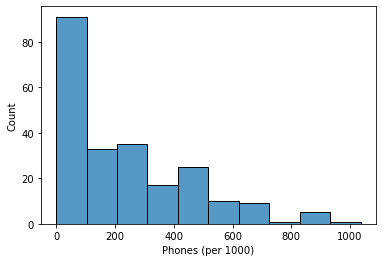

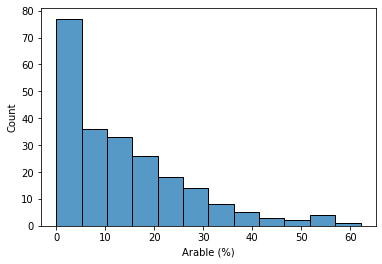

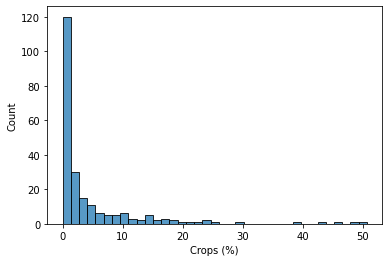

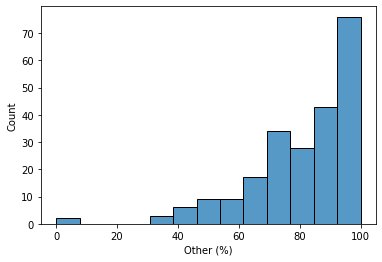

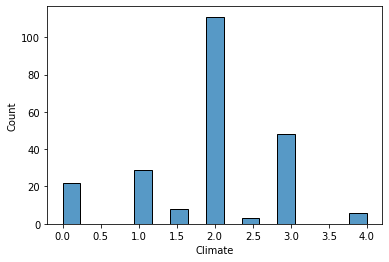

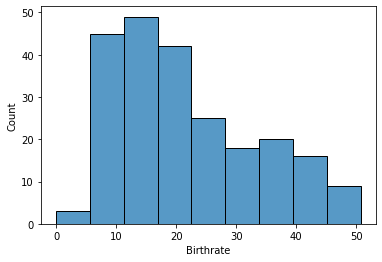

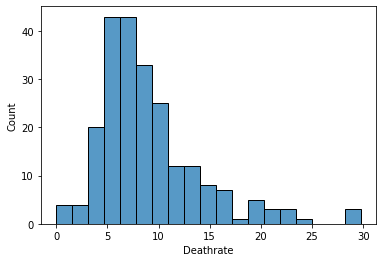

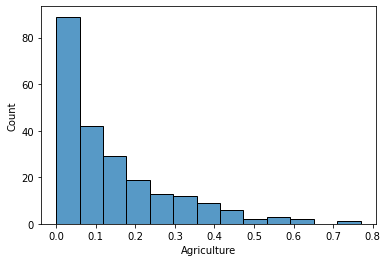

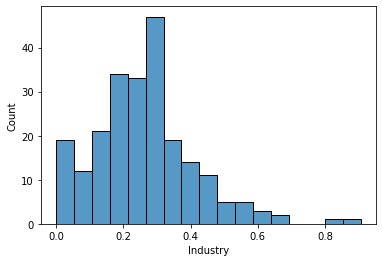

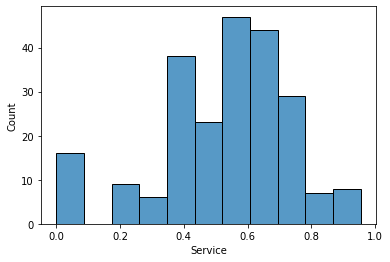

In [64]:
import seaborn as sns
for i in range(len(df_copy.columns)):
    current_column = df_copy.columns[i]
    if (df_copy[current_column].dtype != "object" ):
        sns.histplot(df_copy[current_column])
        plt.show()
    
        

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
from sklearn import preprocessing

In [73]:
df_copy.columns
col_names = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

In [ ]:
# power transformer scaling: 'Population', 'Area (sq. mi.)',
#        'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)' , 'GDP ($ per capita)'  

In [84]:
df_MinMaxScaler = df_copy.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_MinMaxScaler[col_names] = scaler.fit_transform(df_MinMaxScaler[col_names].values)

In [87]:
df_StandardScaler = df_copy.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_StandardScaler[col_names] = scaler.fit_transform(df_StandardScaler[col_names].values)


In [88]:
df_RobustScaler = df_copy.copy()
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_RobustScaler[col_names] = scaler.fit_transform(df_RobustScaler[col_names].values)


In [89]:
df_QuantileTransformer = df_copy.copy()
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_QuantileTransformer[col_names] = scaler.fit_transform(df_QuantileTransformer[col_names].values)


In [91]:
#df['log_income'] = np.log(df['Income'])
df_PowerTransformer = df_copy.copy()
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
 #'' box-cox

df_PowerTransformer[col_names] = scaler.fit_transform(df_PowerTransformer[col_names].values)


In [100]:
df_HalfPowerTransformer = df_copy.copy()
col_names2 = ['Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)' , 'GDP ($ per capita)'  ]
scaler2 = PowerTransformer(method = 'yeo-johnson')
 #'' box-cox
col_names3 = [ 'Net migration', 'Infant mortality (per 1000 births)',
        'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']

df_HalfPowerTransformer[col_names2] = scaler2.fit_transform(df_HalfPowerTransformer[col_names2].values)
scaler3 = QuantileTransformer()

df_HalfPowerTransformer[col_names3] = scaler3.fit_transform(df_HalfPowerTransformer[col_names3].values)




## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Different Scalers

No Scaling

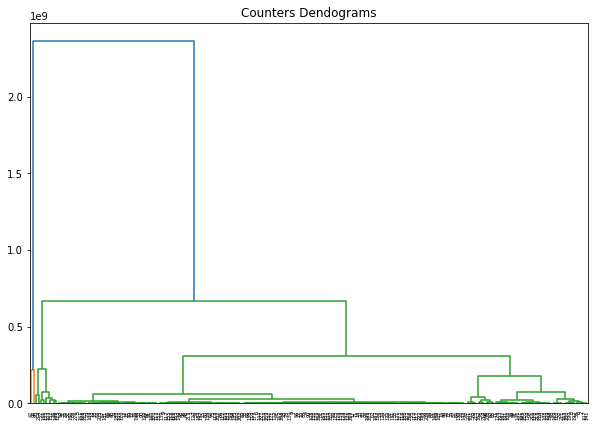

In [92]:

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

MinMaxScaler

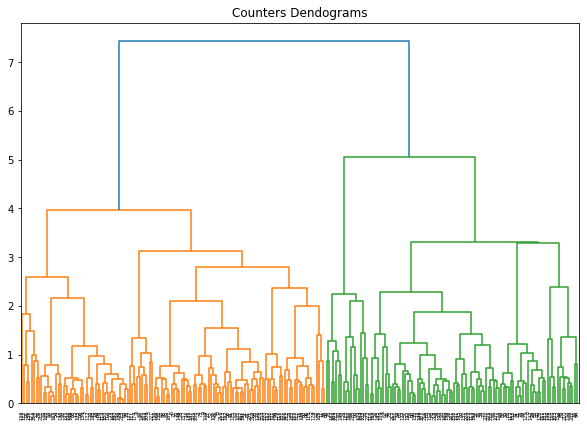

In [93]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_MinMaxScaler.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

StandardScaler

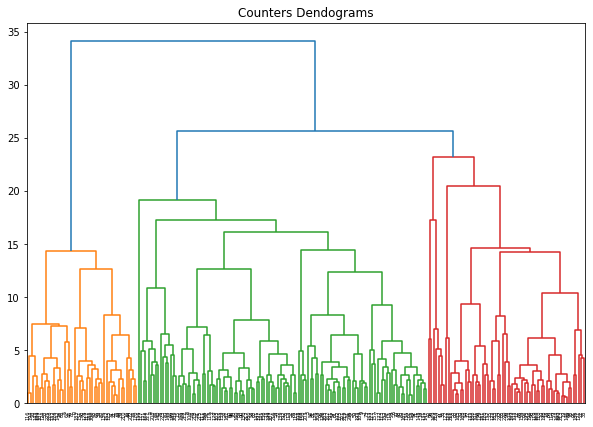

In [94]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_StandardScaler.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

RobustScaler

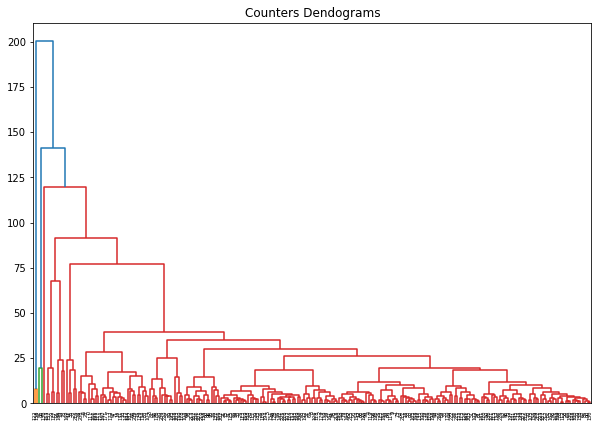

In [95]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_RobustScaler.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

QuantileTransformer

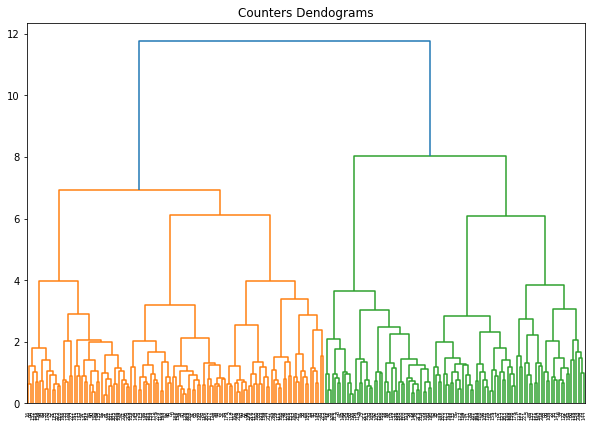

In [96]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_QuantileTransformer.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

PowerTransformer

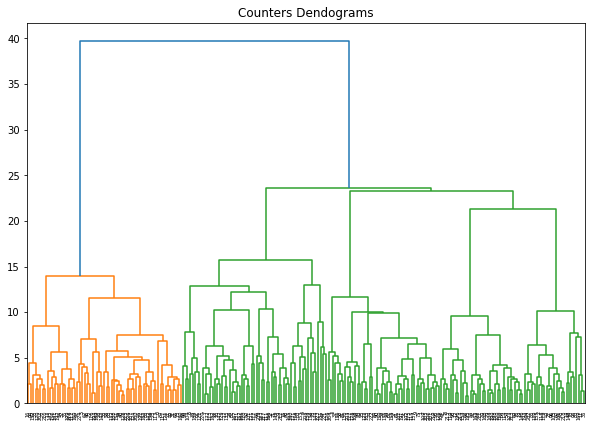

In [97]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_PowerTransformer.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

PowerTransformer for only 'Population', 'Area (sq. mi.)','Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)' , 'GDP ($ per capita)'

And Quantile for the rest



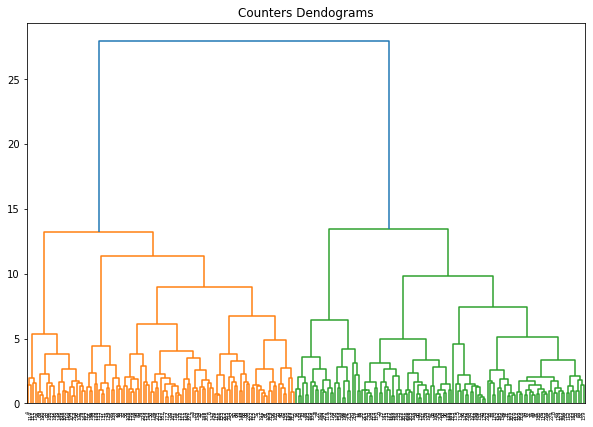

In [101]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_HalfPowerTransformer.drop(columns = ['Country', 'Region']) , method="ward",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

### Different Parameters

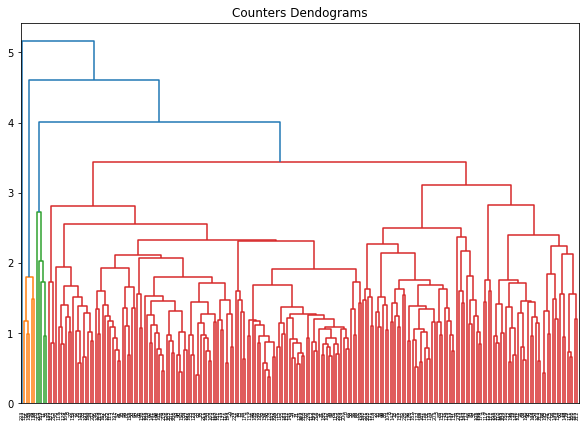

In [102]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_HalfPowerTransformer.drop(columns = ['Country', 'Region']) , method="average",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

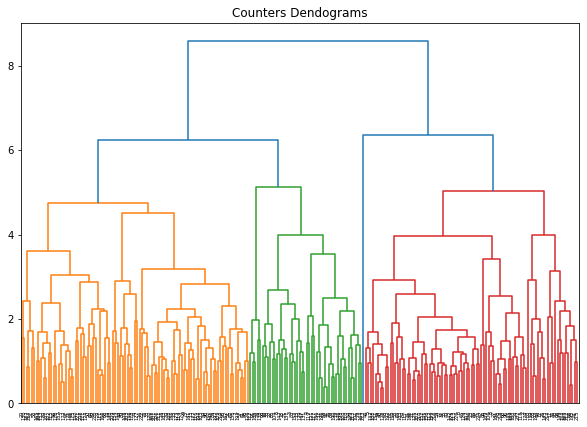

In [103]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_HalfPowerTransformer.drop(columns = ['Country', 'Region']) , method="complete",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

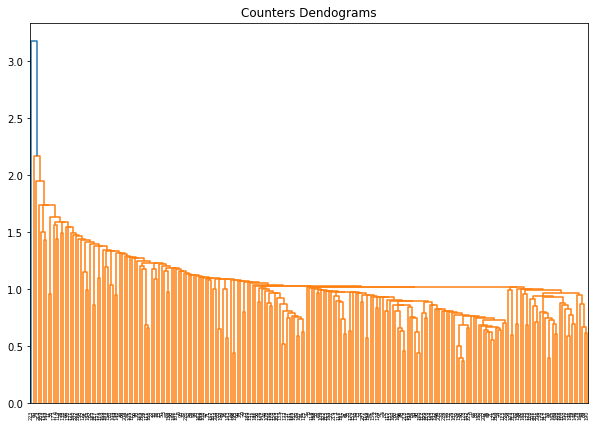

In [105]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_HalfPowerTransformer.drop(columns = ['Country', 'Region']) , method="single",metric="euclidean"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

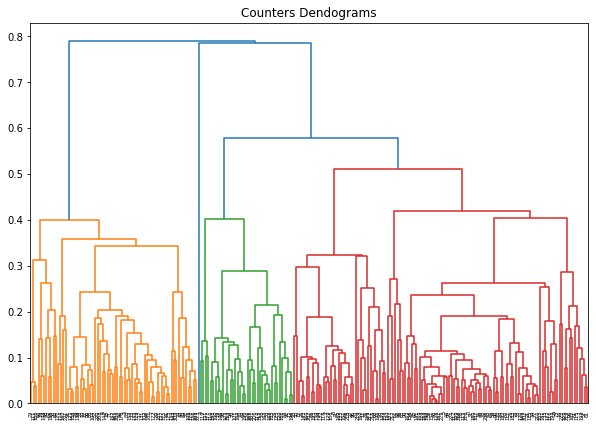

In [110]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_HalfPowerTransformer.drop(columns = ['Country', 'Region']) , method="average",metric="cosine"),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [120]:
#training
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(
    n_clusters = 5, affinity="euclidean",linkage = "ward").fit(df_HalfPowerTransformer.drop(columns = ['Country', 'Region']))
clustering.labels_

array([0, 1, 2, 1, 3, 0, 1, 1, 2, 0, 4, 2, 3, 0, 1, 4, 0, 4, 0, 3, 1, 0,
       4, 0, 2, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 1, 4, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 3, 3, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 2, 3, 2, 1, 2, 0, 1, 0, 3, 0, 4, 3, 2, 1, 1, 1, 0, 4, 0, 0,
       2, 1, 0, 4, 3, 2, 0, 1, 0, 0, 3, 1, 3, 3, 1, 3, 4, 0, 2, 0, 1, 1,
       3, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0, 3, 4, 0, 0, 0, 0, 1, 0, 4, 1, 4,
       0, 4, 1, 0, 1, 0, 4, 0, 1, 0, 0, 2, 1, 0, 3, 1, 1, 2, 0, 0, 0, 1,
       2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 3, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1,
       1, 3, 1, 2, 0, 0, 1, 0, 4, 0, 3, 1, 0, 0, 3, 1, 0, 2, 0, 2, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 3, 2, 2, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0], dtype=int64)

## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 